Data fields:

Access_ID - Unique identification of the user access to the website

Date - Website visit date

AccountMng_Pages - Number of pages visited by the user about account management

AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages

FAQ_Pages - Number of pages visited by the user about frequently asked questions, shipping information and company related pages

FAQ_Duration - Total amount of time (seconds) spent by the user on FAQ pages

Product_Pages - Number of pages visited by the user about products and services offered by the company

Product_Duration - Total amount in time (seconds) spent by the user on products and services related pages

GoogleAnalytics_BounceRate - Average bounce rate value of the pages visited by the user, provided by google analytics

GoogleAnalytics_ExitRate - Average exit rate value of the pages visited by the user, provided by google analytics

GoogleAnalytics_PageValue - Average page value of the pages visited by the user, provided by google analytics

OS - Operating System of the user

Browser - Browser used to access the webpage

Country - The country of the user

Type_of_Traffic - Traffic Source by which the user has accessed the website (e.g., email, banner, direct)

Type_of_Visitor - User type as "New access", "Returner" or "Other"

Buy - Class label indicating if the user finalized their actions in the website with a transaction

In [112]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [4]:
df.head()

## existe forma de calcular o id do utilizador pelo Access_ID?
## temos a descrição das categorias para o browser e type of traffic?

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [10]:
df.duplicated(subset=['Access_ID']).sum()

0

In [74]:
round(df.Buy.mean(),3)*100

# we have an average conversion rate of 15.5%

15.5

In [ ]:
# change types

# to date
df.Date = df.Date.apply(lambda x: datetime.datetime.strptime(x, "%d-%b-%y"))

In [66]:
# get details from the date
df['Month_Access'] = df.Date.apply(lambda x: x.month)
df['Day_Access'] = df.Date.apply(lambda x: x.day)
df['WDay_Access'] = df.Date.apply(lambda x: x.weekday())

In [67]:
df['WDay_Access'].value_counts() ## monday is 0

0    1654
1    1553
4    1508
2    1448
3    1438
6    1289
5    1109
Name: WDay_Access, dtype: int64

['Windows',
 'Android',
 'MacOSX',
 'iOS',
 'Ubuntu',
 'Chrome OS',
 'Other',
 'Fedora']

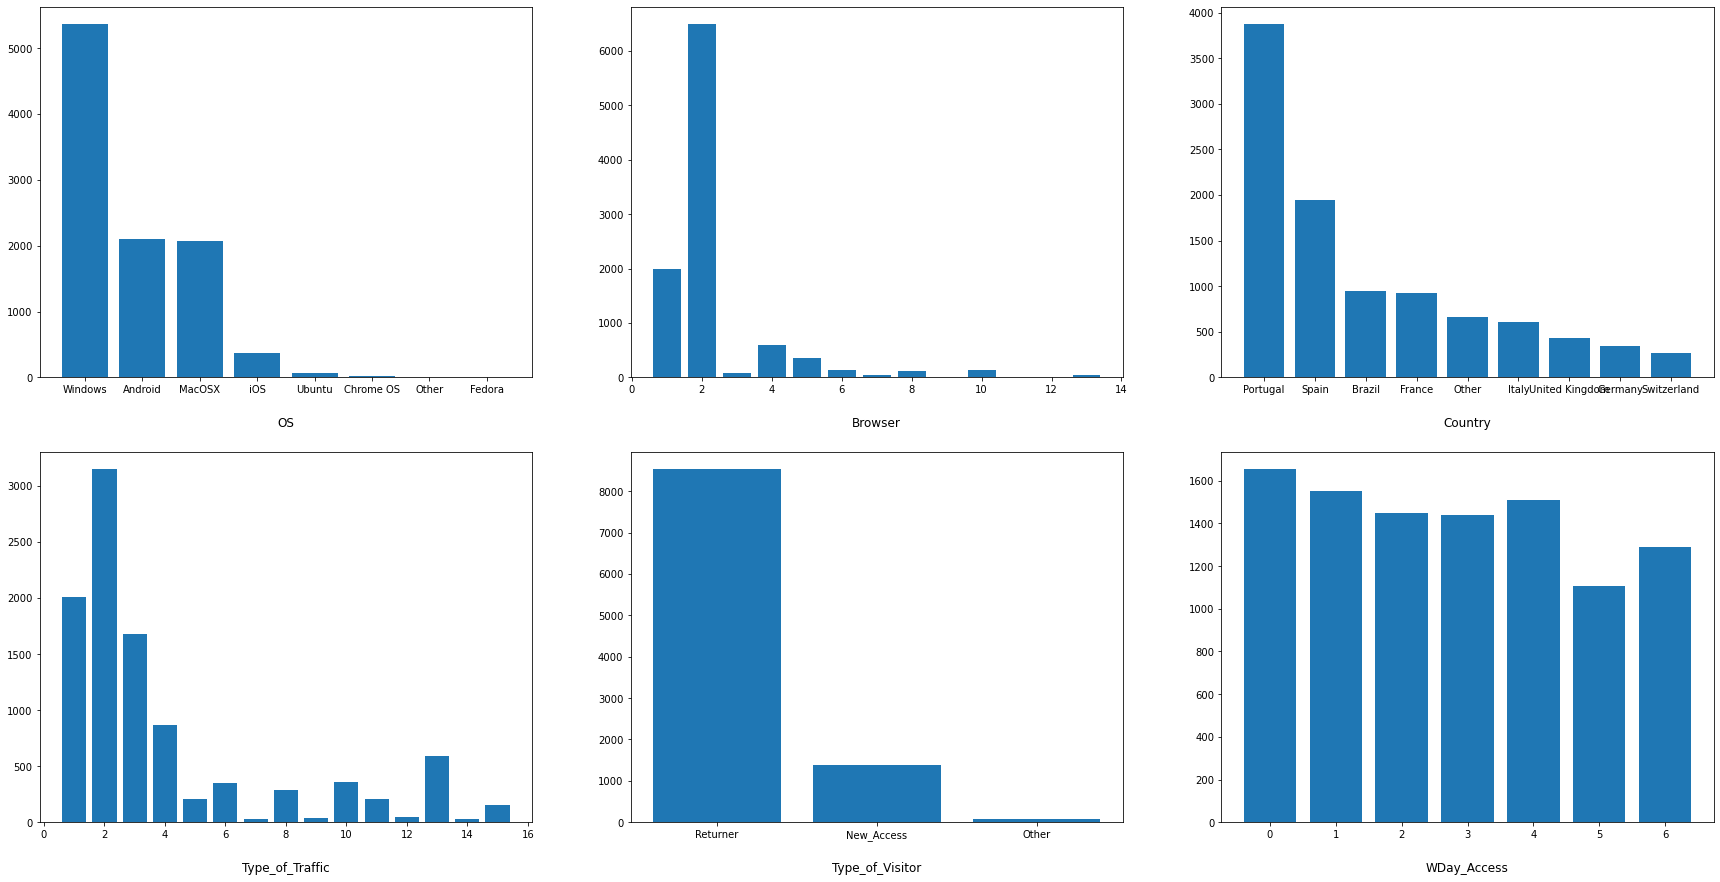

In [75]:

## distribution of categorical variables

cat_vars = ['OS','Browser','Country','Type_of_Traffic','Type_of_Visitor','WDay_Access']

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(cat_vars) / 2), figsize=(30, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), cat_vars): # Notice the zip() function and flatten() method
    ax.bar(height=list(df[feat].value_counts()), x=list(df[feat].value_counts().index))
    ax.set_title(feat, y=-0.15)
plt.show()
    


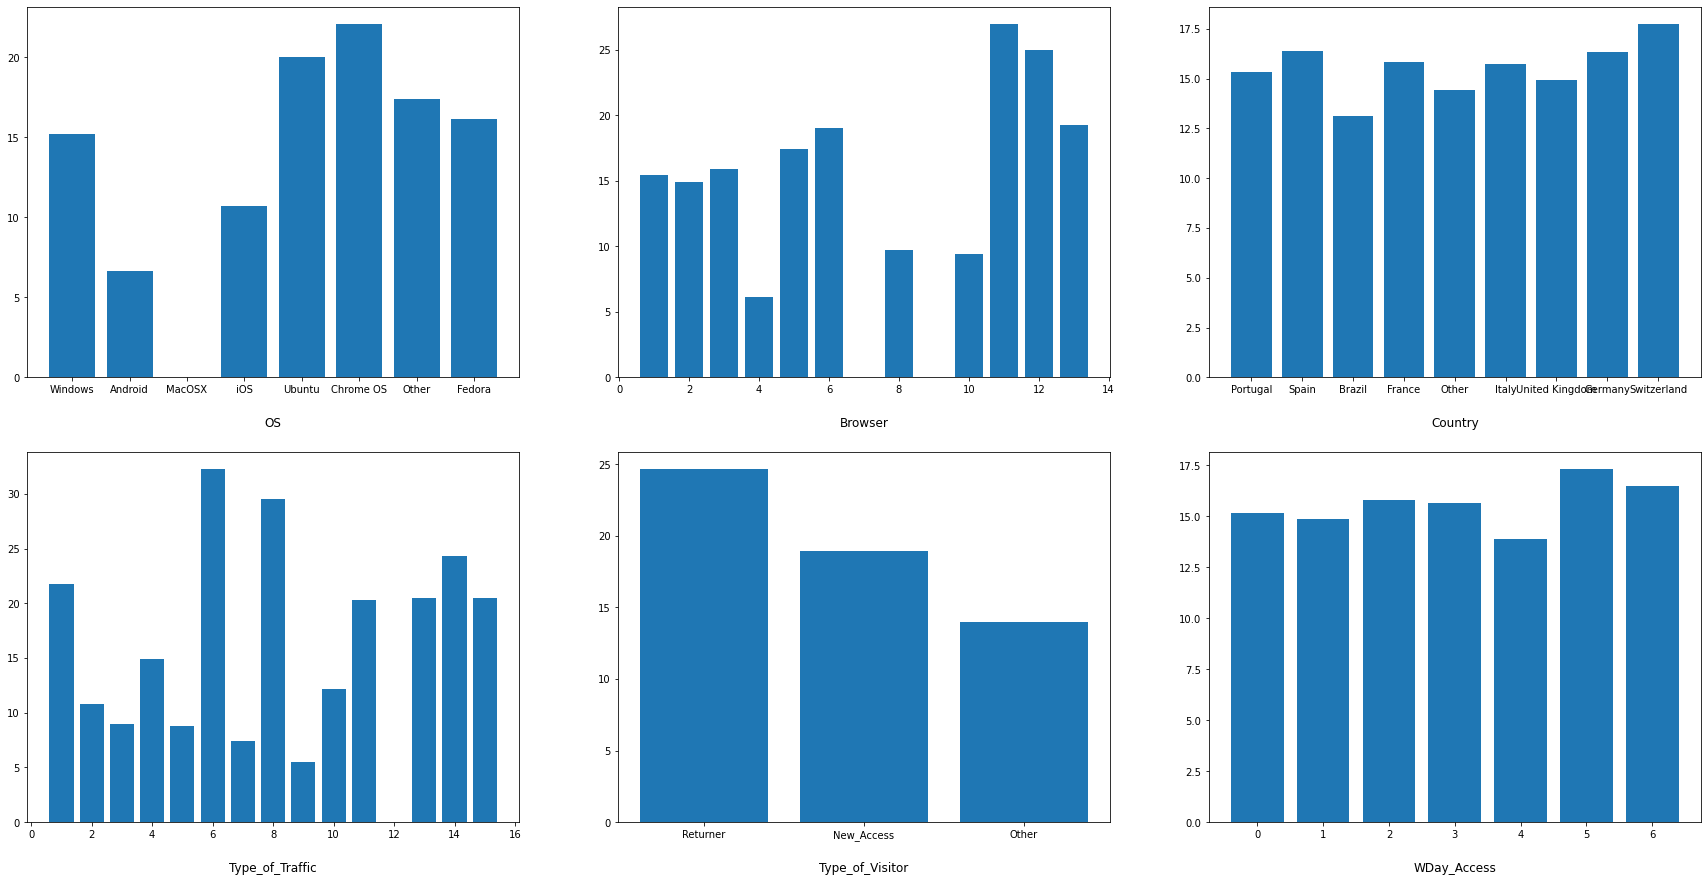

In [77]:
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(cat_vars) / 2), figsize=(30, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), cat_vars): # Notice the zip() function and flatten() method
    ax.bar(height=list(df.groupby(feat).Buy.agg('mean')*100), x=list(df[feat].value_counts().index))
    ax.set_title(feat, y=-0.15)
plt.show()
    

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Access_ID                   9999 non-null   int64         
 1   Date                        9999 non-null   datetime64[ns]
 2   AccountMng_Pages            9999 non-null   int64         
 3   AccountMng_Duration         9999 non-null   float64       
 4   FAQ_Pages                   9999 non-null   int64         
 5   FAQ_Duration                9999 non-null   float64       
 6   Product_Pages               9999 non-null   int64         
 7   Product_Duration            9999 non-null   float64       
 8   GoogleAnalytics_BounceRate  9999 non-null   float64       
 9   GoogleAnalytics_ExitRate    9999 non-null   float64       
 10  GoogleAnalytics_PageValue   9999 non-null   float64       
 11  OS                          9999 non-null   object      

In [58]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month_Access
0,102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0,3
1,103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0,5
2,103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0,12
3,103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1,12
4,103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1,11


In [62]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy,Month_Access,Day_Access
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216,7.645865,15.790879
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128,3.398354,8.783838
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000,5.000000,8.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000,7.000000,16.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000,11.000000,23.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000,12.000000,31.000000


In [87]:
## encoding

dummy_os = pd.get_dummies(df['OS'], prefix='OS')
dummy_browser = pd.get_dummies(df['Browser'], prefix='Browser')
dummy_country = pd.get_dummies(df['Country'], prefix='Country')
dummy_traffic = pd.get_dummies(df['Type_of_Traffic'], prefix='Traffic')
dummy_visitor = pd.get_dummies(df['Type_of_Visitor'], prefix='Visitor')
dummy_wday = pd.get_dummies(df['WDay_Access'], prefix='Wday')

df = pd.concat([df, dummy_os, dummy_browser, dummy_country, dummy_traffic, dummy_visitor, dummy_wday], axis=1)

In [90]:
df.set_index('Access_ID', inplace=True)

In [95]:
df.drop(['Date','OS','Browser','Country','Type_of_Traffic','Type_of_Visitor','WDay_Access'], axis=1, inplace=True)

In [96]:
df.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy,...,Visitor_New_Access,Visitor_Other,Visitor_Returner,Wday_0,Wday_1,Wday_2,Wday_3,Wday_4,Wday_5,Wday_6
Access_ID,,,,,,,,,,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,0,...,0,0,1,0,0,0,0,0,1,0
103117814,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,0,...,0,0,1,0,0,1,0,0,0,0
103201891,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,0,...,0,0,1,0,0,0,0,1,0,0
103226087,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,1,...,0,0,1,0,1,0,0,0,0,0
103234445,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,1,...,0,0,1,0,1,0,0,0,0,0


In [98]:
X = df.drop('Buy',axis=1)
y = df['Buy']

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 102863333 to 798444008
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AccountMng_Pages            9999 non-null   int64  
 1   AccountMng_Duration         9999 non-null   float64
 2   FAQ_Pages                   9999 non-null   int64  
 3   FAQ_Duration                9999 non-null   float64
 4   Product_Pages               9999 non-null   int64  
 5   Product_Duration            9999 non-null   float64
 6   GoogleAnalytics_BounceRate  9999 non-null   float64
 7   GoogleAnalytics_ExitRate    9999 non-null   float64
 8   GoogleAnalytics_PageValue   9999 non-null   float64
 9   Month_Access                9999 non-null   int64  
 10  Day_Access                  9999 non-null   int64  
 11  OS_Android                  9999 non-null   uint8  
 12  OS_Chrome OS                9999 non-null   uint8  
 13  OS_Fedora           

In [105]:
## undersampling

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [107]:
y_under.mean()*100

50.0

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42, stratify=y_under)

In [109]:
print(y_train.mean())
print(y_test.mean())

0.5
0.5


In [110]:
X_train.shape

(2172, 65)

In [111]:
X_test.shape

(932, 65)

In [113]:
## train model

GradientBoost1 = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=3, random_state=93).fit(X_train, y_train)

#accuracy
GradientBoost1.score(X_test, y_test) #0.83

0.8293991416309013

<AxesSubplot:>

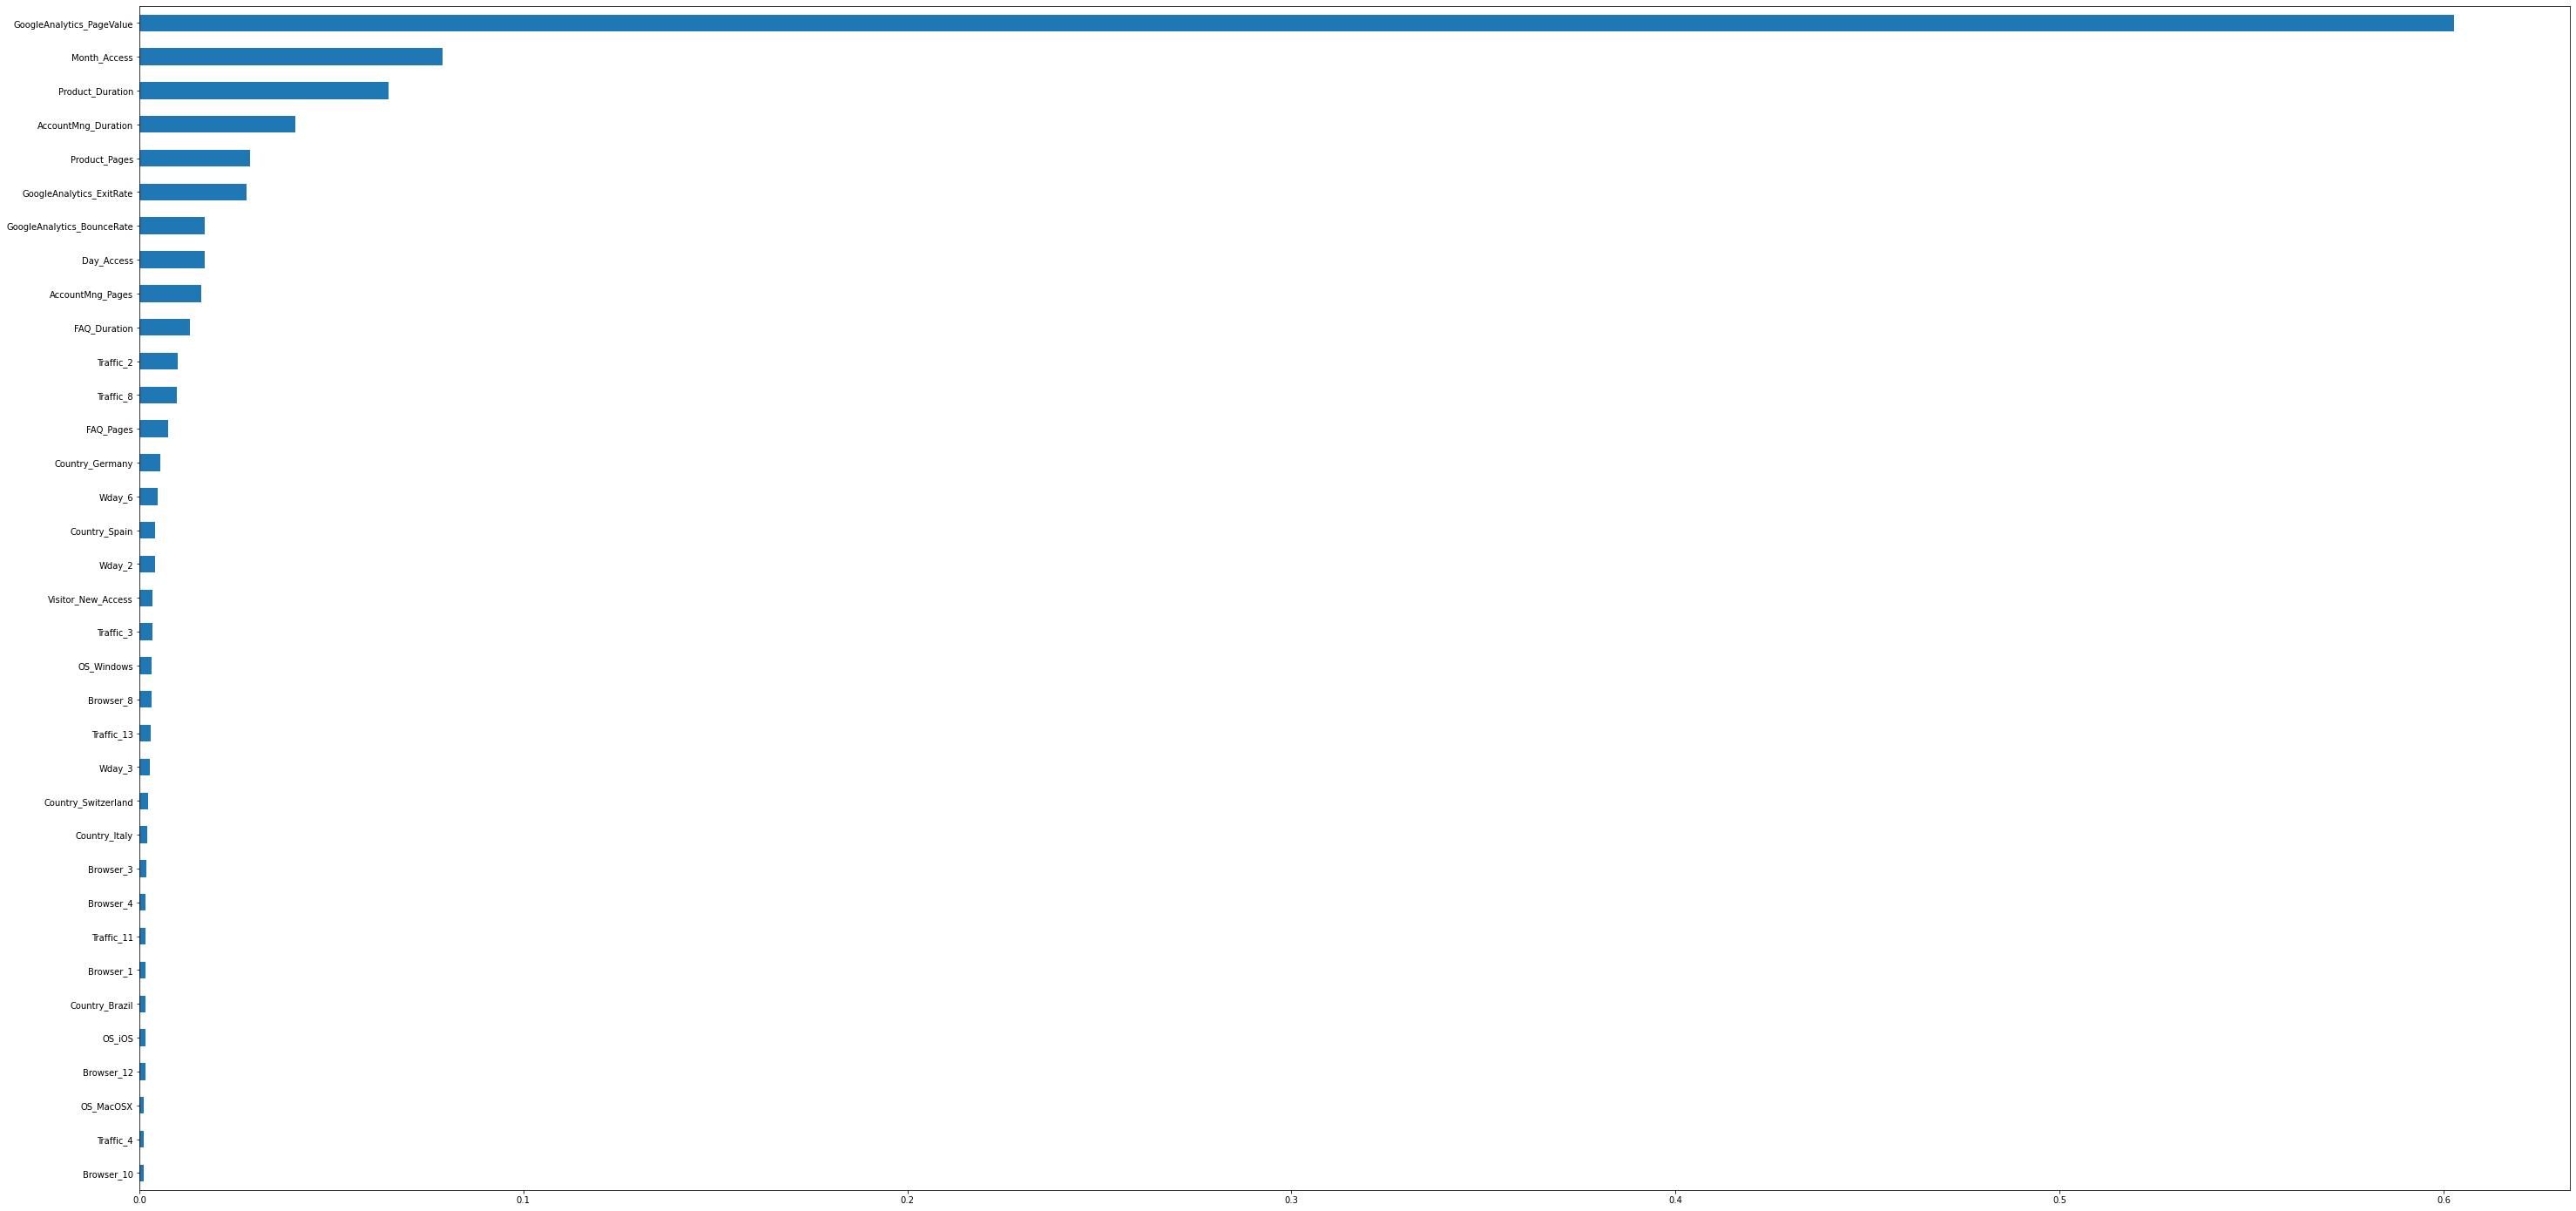

In [130]:
GB1_feat_imprt = pd.Series(GradientBoost1.feature_importances_, index=X_train.columns).sort_values()
fig = plt.figure(figsize=(50,25))
GB1_feat_imprt[GB1_feat_imprt>0.001].plot(kind='barh')

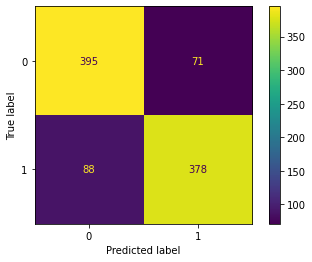

In [131]:
metrics.plot_confusion_matrix(GradientBoost1, X_test, y_test)  

In [138]:
GB1_pred = GradientBoost1.predict(X_test)
GB1_score = GradientBoost1.predict_proba(X_test)[:,1]

In [148]:
print('Precision: '+ str(round(metrics.precision_score(y_test, GB1_pred),2)))
print('Recall: '+ str(round(metrics.recall_score(y_test, GB1_pred),2)))
print('F1 Score: '+ str(round(metrics.f1_score(y_test, GB1_pred),2)))


Precision: 0.84
Recall: 0.81
F1 Score: 0.83
